#### Random Forest - Heart Data

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df = pd.read_csv('heart.csv')
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Model Training 

In [7]:
x = df.drop('target',axis = 1)
y = df.target

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=12)

In [21]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=15, oob_score=True)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=15)

### Evaluation

In [28]:
y_pred_train = rf_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n', clf_report)

oob_score = rf_clf.oob_score_
print("OOB Score :",oob_score )

Confusion Matrix :
 [[110   0]
 [  0 132]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

OOB Score : 0.8223140495867769


In [26]:
y_pred_test = rf_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n", cnf_matrix)

accuracy_score(y_test, y_pred_test)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred_test)
print('Classification Report :\n', clf_report)

Confusion Matrix :
 [[20  8]
 [ 2 31]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



##### Feature Importance

In [19]:
rf_clf.feature_importances_

array([0.08384096, 0.02446872, 0.11741883, 0.07615302, 0.08346407,
       0.01013941, 0.02058405, 0.10119681, 0.03648046, 0.14125738,
       0.05763269, 0.15093586, 0.09642775])

<Axes: >

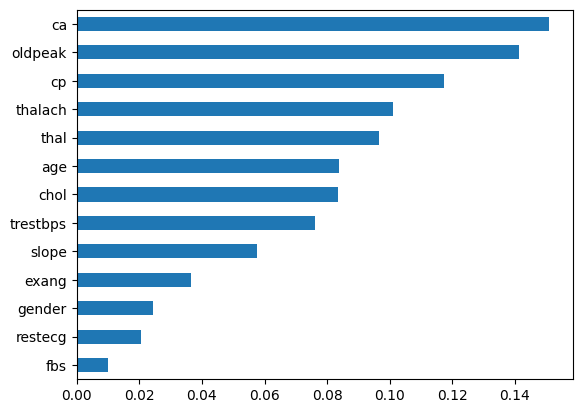

In [20]:
s1 = pd.Series(rf_clf.feature_importances_, index = x.columns)
s1.sort_values().plot(kind = 'barh')

### Hyperparameter Tuning

In [30]:
rf_clf = RandomForestClassifier(n_jobs=-1, bootstrap=True,max_features='sqrt', random_state=15, oob_score=True, verbose=1)
rf_clf.fit(x_train, y_train)

hyp_grid = {"n_estimators" : range(10,150,10),
            "criterion" : ['gini', 'entropy'],
            "max_depth" : range(4,8),
            "min_samples_split" : range(10,20),
            "min_samples_leaf" : range(8,15)
            }

gscv_rf_clf = GridSearchCV(rf_clf, hyp_grid, cv=3, n_jobs=-1, verbose=1)
gscv_rf_clf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


Fitting 3 folds for each of 7840 candidates, totalling 23520 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=15, verbose=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 8),
                         'min_samples_leaf': range(8, 15),
                         'min_samples_split': range(10, 20),
                         'n_estimators': range(10, 150, 10)},
             verbose=1)

In [31]:
rf_clf = gscv_rf_clf.best_estimator_
rf_clf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=20, n_jobs=-1,
                       oob_score=True, random_state=15, verbose=1)

In [32]:
y_pred_train = rf_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n', clf_report)

oob_score = rf_clf.oob_score_
print("OOB Score :",oob_score )

Confusion Matrix :
 [[ 86  24]
 [  9 123]]
Accuracy : 0.8636363636363636
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       110
           1       0.84      0.93      0.88       132

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.86      0.86       242

OOB Score : 0.8140495867768595


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    0.0s finished


In [33]:
y_pred_test = rf_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix :\n", cnf_matrix)

accuracy_score(y_test, y_pred_test)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred_test)
print('Classification Report :\n', clf_report)

Confusion Matrix :
 [[17 11]
 [ 2 31]]
Accuracy : 0.8636363636363636
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.74      0.94      0.83        33

    accuracy                           0.79        61
   macro avg       0.82      0.77      0.78        61
weighted avg       0.81      0.79      0.78        61



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    0.0s finished
